In [8]:
import pandas as pd
import joblib

clf = joblib.load("rf_area_classifier_full.pkl")

new_data = pd.read_csv("../2_Feature_Extraction/extract_features/tracking_features.csv")  
X_new = new_data.drop(columns=["tracking_id", "num_stops"])

new_data["predicted_label"] = clf.predict(X_new)
new_data.to_csv("new_tracking_predictions.csv", index=False)



<Axes: title={'center': 'Predicted Label Distribution'}, xlabel='predicted_label'>

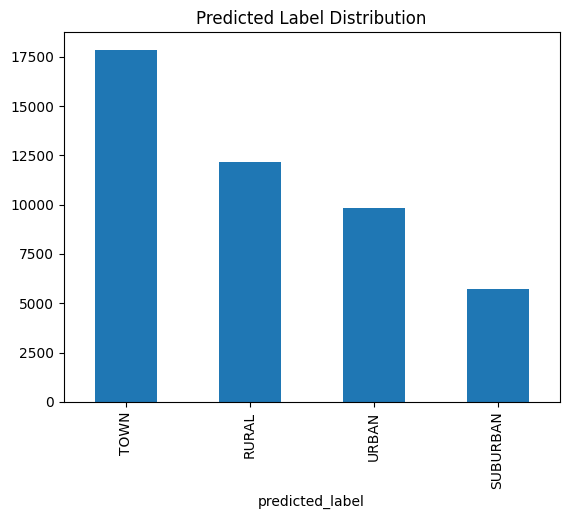

In [9]:
new_data["predicted_label"].value_counts().plot(kind="bar", title="Predicted Label Distribution")


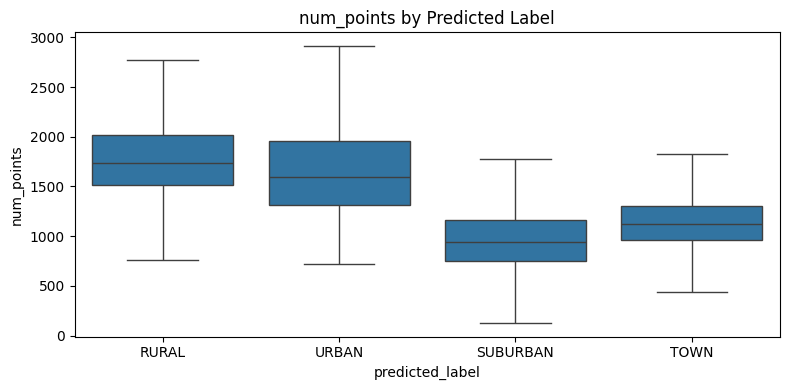

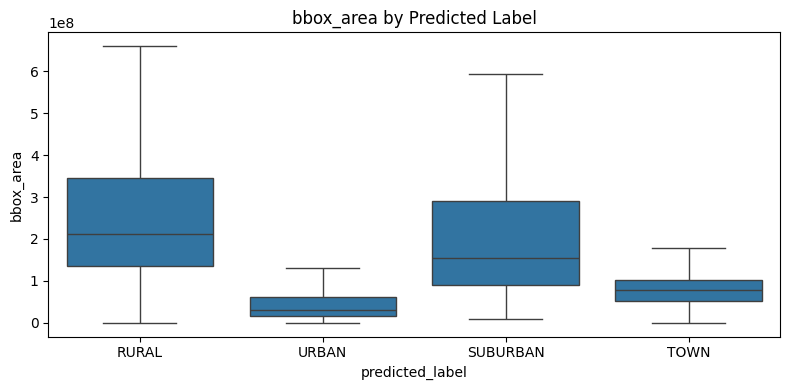

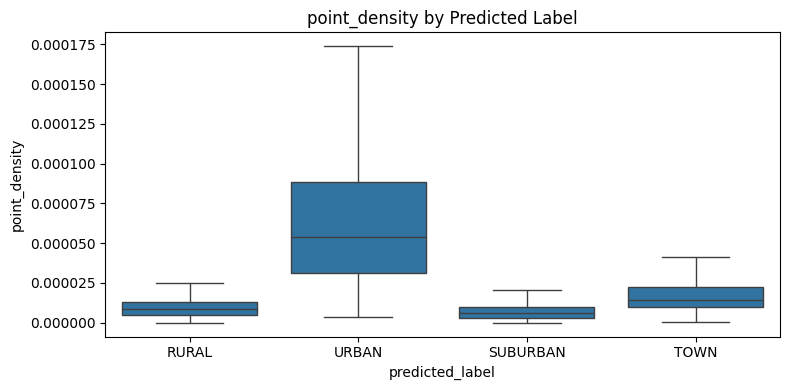

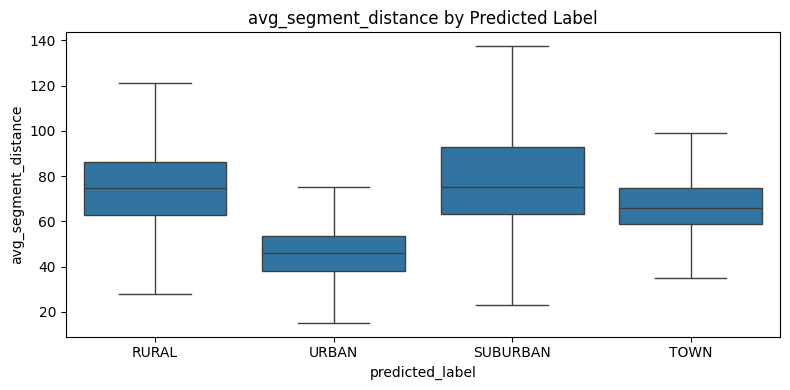

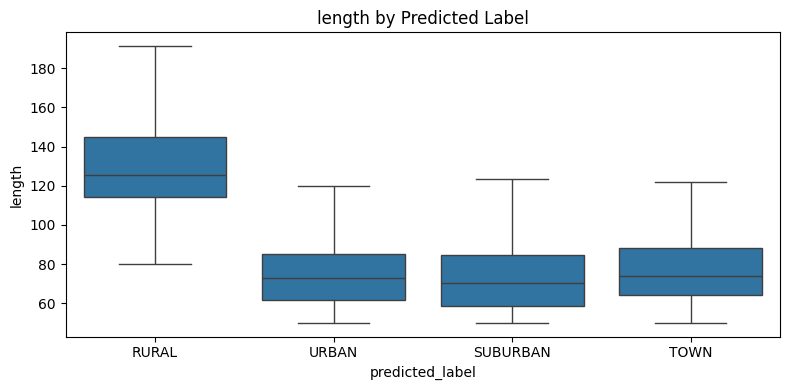

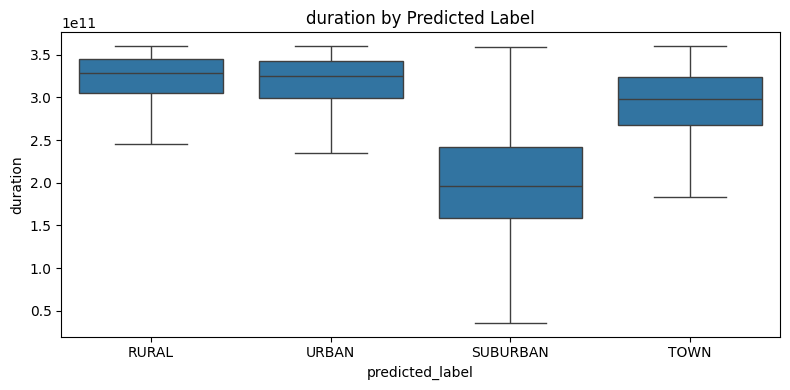

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ["num_points", "bbox_area", "point_density", "avg_segment_distance", "length", "duration"]

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=new_data, x="predicted_label", y=feature, showfliers=False)
    plt.title(f"{feature} by Predicted Label")
    plt.tight_layout()
    plt.show()


In [11]:
df = pd.read_csv("new_tracking_predictions.csv")

for label in df["predicted_label"].unique():
    print(f"\n=== {label} ===")
    display(df[df["predicted_label"] == label].sample(3, random_state=42))



=== RURAL ===


tracking_id  num_points     bbox_area  point_density  \
20399        43791        1801  7.848789e+08       0.000002   
29931        64225        1308  4.073104e+08       0.000003   
13285        28980        1565  9.704815e+07       0.000016   

       avg_segment_distance  total_distance  straightness  \
20399             75.331068   135595.923234      0.255327   
29931             92.891684   121409.430743      0.002945   
13285             71.324507   111551.528751      0.000080   

       mean_heading_change  num_stops      duration      length  \
20399             0.454835       1801  358560000000  136.531023   
29931             0.484301       1308  274780000000  122.437671   
13285             0.552759       1565  287190000000  112.195889   

      predicted_label  
20399           RURAL  
29931           RURAL  
13285           RURAL


=== URBAN ===


tracking_id  num_points     bbox_area  point_density  \
27477        58385        2361  9.469724e+07       0.000025   
12027        27088        1453  2.525325e+07       0.000058   
3780         10613        1521  5.066294e+07       0.000030   

       avg_segment_distance  total_distance  straightness  \
27477             31.773721    74985.981033      0.000149   
12027             44.594476    64751.178724      0.000021   
3780              43.658612    66361.089709      0.068372   

       mean_heading_change  num_stops      duration     length predicted_label  
27477             0.517663       2361  341570000000  75.363805           URBAN  
12027             0.737499       1453  278270000000  65.708950           URBAN  
3780              0.691270       1521  339640000000  69.566965           URBAN


=== SUBURBAN ===


tracking_id  num_points     bbox_area  point_density  \
35709        77040         899  4.547328e+07       0.000020   
3542         10133        2033  4.821901e+08       0.000004   
9452         22748         641  2.731491e+08       0.000002   

       avg_segment_distance  total_distance  straightness  \
35709             70.114438    62962.765638      0.052147   
3542              45.690687    92843.476960      0.316935   
9452             115.359244    73829.916245      0.000809   

       mean_heading_change  num_stops      duration     length predicted_label  
35709             0.612684        899  211070000000  63.846350        SUBURBAN  
3542              0.695270       2033  269640000000  96.433650        SUBURBAN  
9452              0.665979        641  180840000000  73.991313        SUBURBAN


=== TOWN ===


tracking_id  num_points     bbox_area  point_density  \
25207        52554        1177  8.405213e+07       0.000014   
28398        60700         644  2.796702e+07       0.000023   
29923        64209        1219  4.525686e+07       0.000027   

       avg_segment_distance  total_distance  straightness  \
25207             45.522586    53534.561268      0.049187   
28398             80.079914    51491.384977      0.087380   
29923             68.834398    83840.297350      0.003604   

       mean_heading_change  num_stops      duration     length predicted_label  
25207             1.039584       1177  213950000000  54.292481            TOWN  
28398             0.656896        644  262630000000  52.377604            TOWN  
29923             0.600832       1219  335770000000  84.931015            TOWN

In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import contextily as ctx
# import geopandas as gpd
# from shapely.geometry import LineString

# predicted_df = pd.read_csv("new_tracking_predictions.csv")
# waypoints_df = pd.read_parquet("../2_Feature_Extraction/data/filtered_waypoints.parquet")

# sampled_ids = (
#     predicted_df.groupby("predicted_label")
#     .apply(lambda x: x.sample(n=2, random_state=42))["tracking_id"]
#     .explode()
#     .tolist()
# )

# sampled_routes = waypoints_df[waypoints_df["id_tracking"].isin(sampled_ids)]

# fig, axes = plt.subplots(2, 4, figsize=(20, 10))
# axes = axes.flatten()

# color_map = {
#     "RURAL": "red",
#     "SUBURBAN": "orange",
#     "TOWN": "blue",
#     "URBAN": "green"
# }

# for i, tracking_id in enumerate(sampled_ids):
#     ax = axes[i]
#     route = sampled_routes[sampled_routes["id_tracking"] == tracking_id].sort_values("sequence")
#     coords = list(zip(route["longitude"], route["latitude"]))
#     label = predicted_df[predicted_df["tracking_id"] == tracking_id]["predicted_label"].values[0]

#     if len(coords) < 2:
#         continue

#     line = LineString(coords)
#     gdf = gpd.GeoDataFrame(index=[0], geometry=[line], crs="EPSG:4326").to_crs(epsg=3857)

#     gdf.plot(ax=ax, color=color_map.get(label, "gray"), linewidth=2)
#     ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

#     ax.set_title(f"{label} - ID {tracking_id}", fontsize=9)
#     ax.set_axis_off()

# for j in range(len(sampled_ids), len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# # plt.savefig("Figures/predicted_tracking_routes_mapgrid.png", dpi=300)
# plt.show()


/tmp/ipykernel_2986/1810225943.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=trackings_per_group, random_state=42))["tracking_id"]


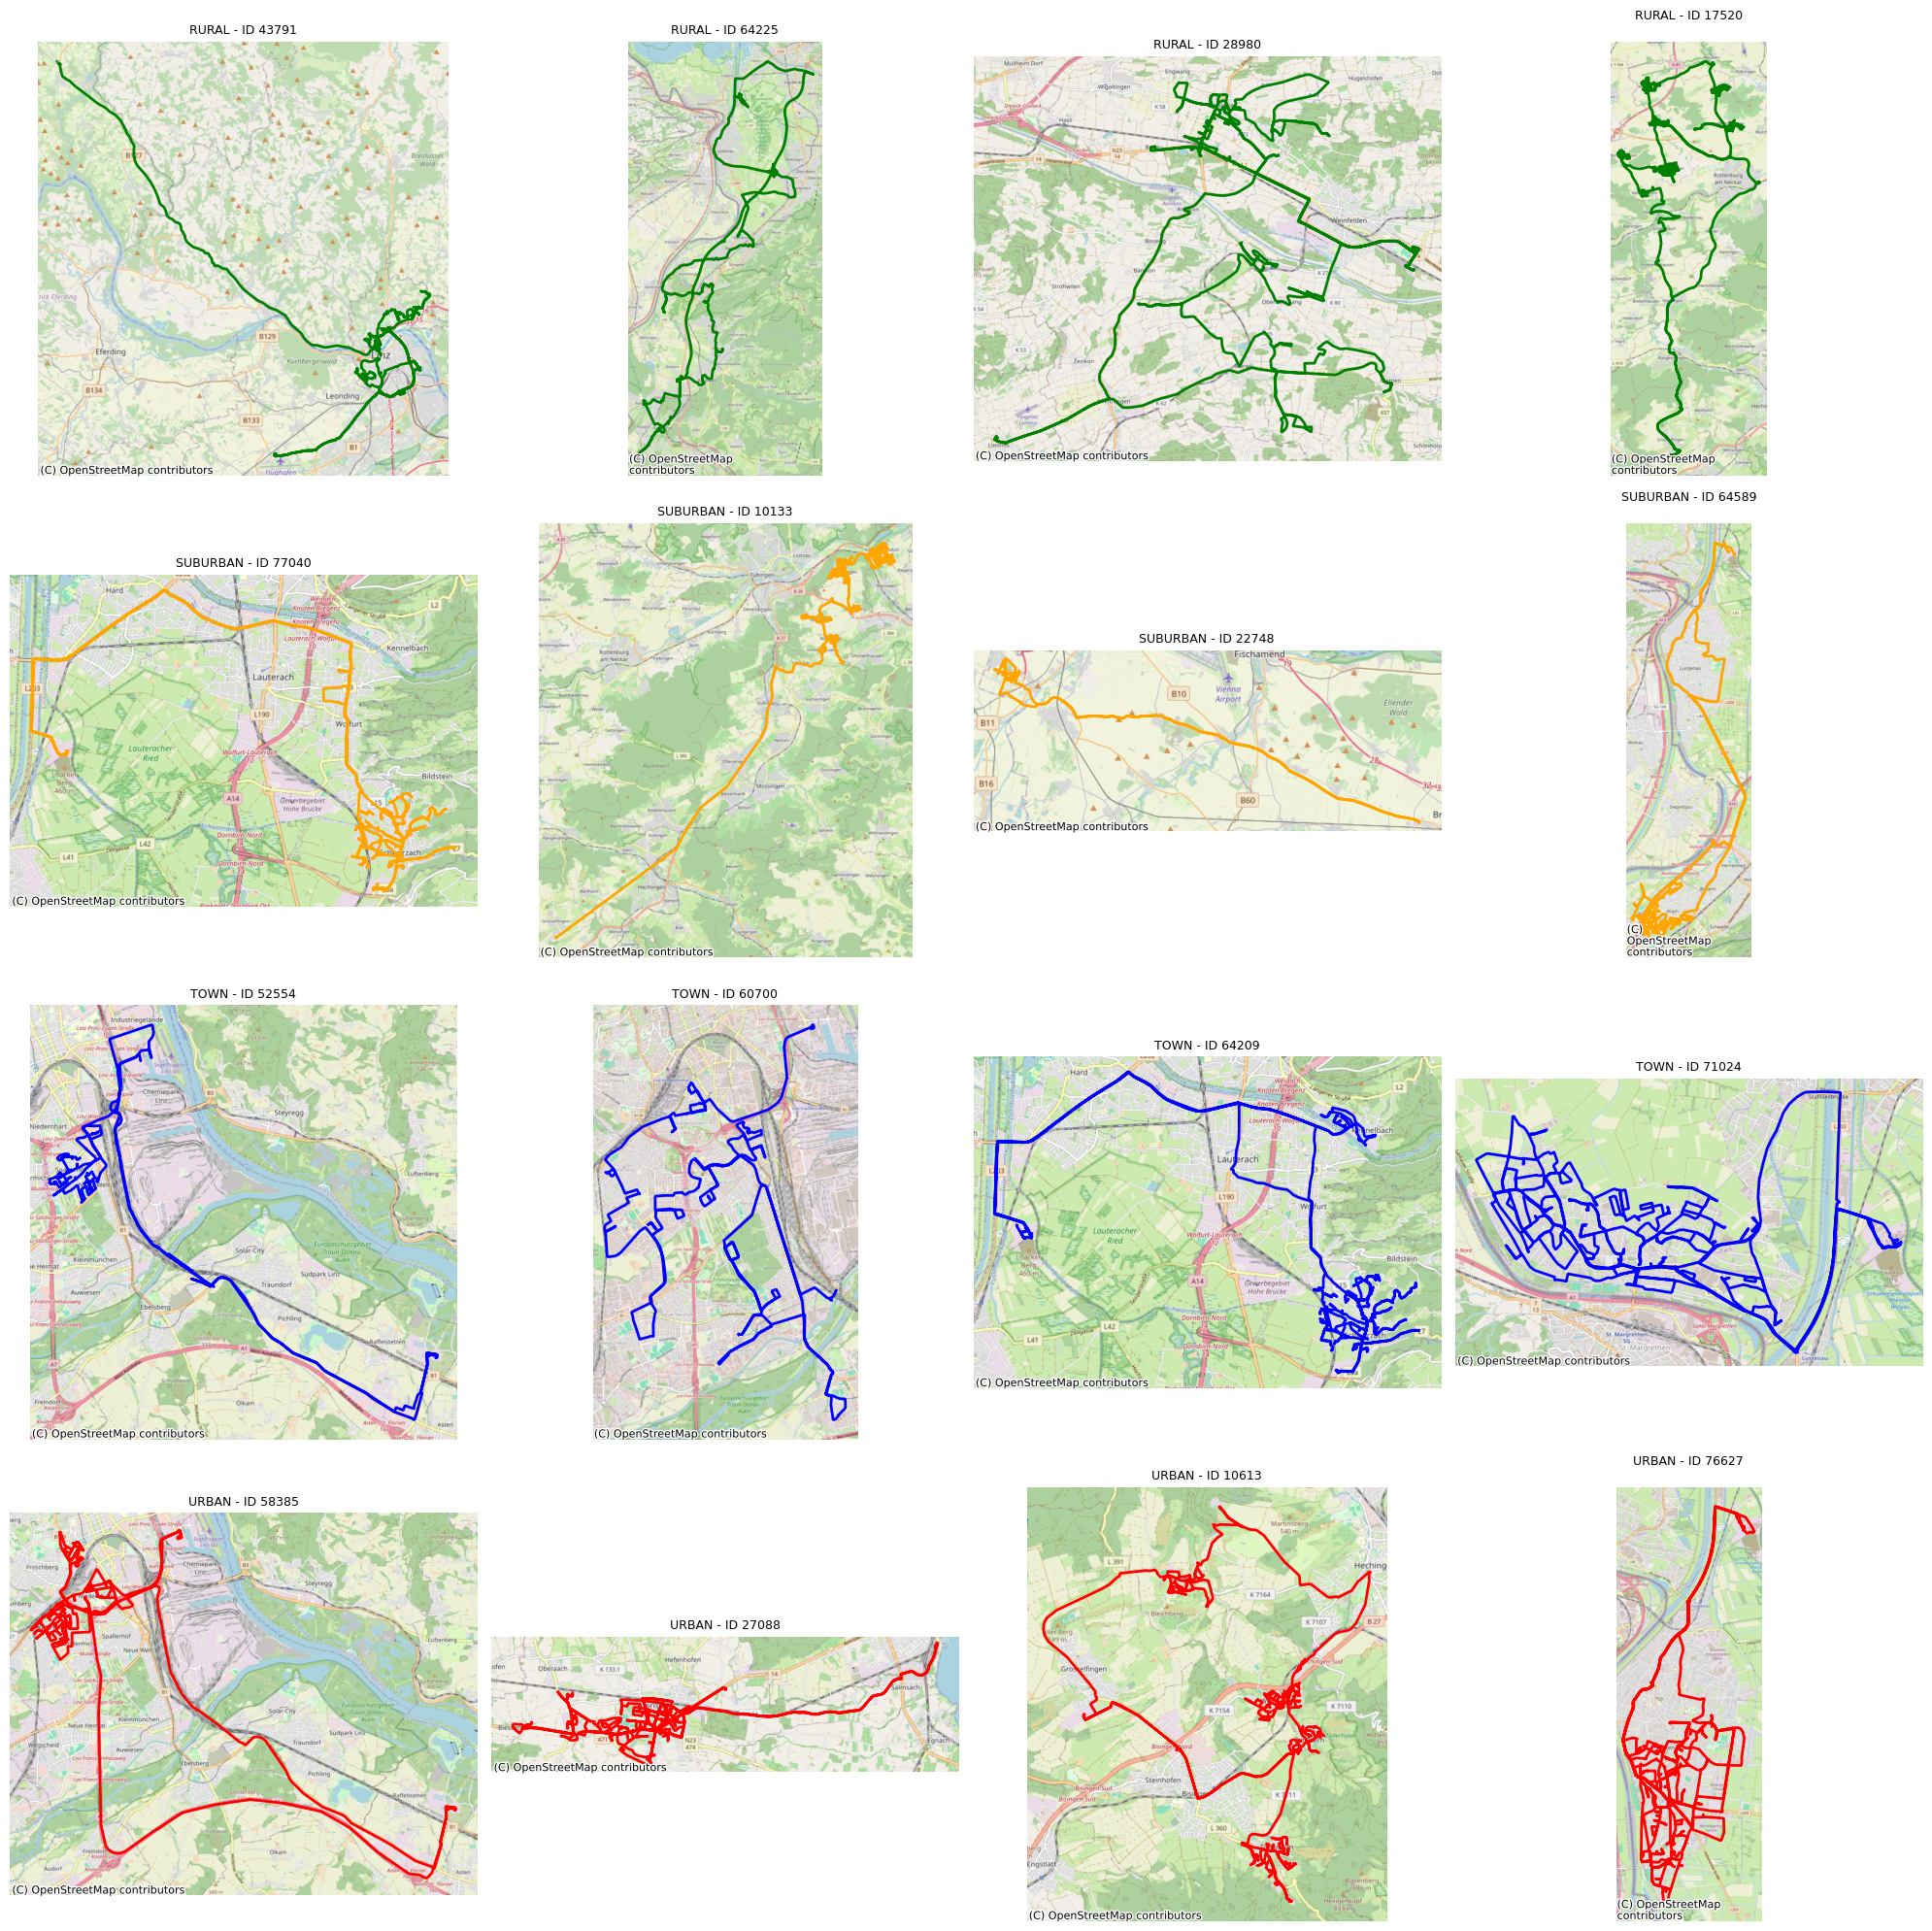

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import LineString
import pyarrow.parquet as pq

# Load predictions (small file)
predicted_df = pd.read_csv("new_tracking_predictions.csv")

trackings_per_group = 4

# Sample 2 IDs per predicted label
sampled_ids = (
    predicted_df.groupby("predicted_label")
    .apply(lambda x: x.sample(n=trackings_per_group, random_state=42))["tracking_id"]
    .explode()
    .tolist()
)

# Efficiently load only the required trackings from large Parquet file
table = pq.read_table(
    "../Data_Preperation/filtered_data_full_1.parquet",
    filters=[("id_tracking", "in", sampled_ids)]
)
sampled_routes = table.to_pandas()

# Plotting
fig, axes = plt.subplots(trackings_per_group, 4, figsize=(20, 20))
axes = axes.flatten()

color_map = {
    "URBAN": "red",
    "SUBURBAN": "orange",
    "TOWN": "blue",
    "RURAL": "green",
}

for i, tracking_id in enumerate(sampled_ids):
    ax = axes[i]
    route = sampled_routes[sampled_routes["id_tracking"] == tracking_id].sort_values("sequence")
    coords = list(zip(route["longitude"], route["latitude"]))
    label = predicted_df[predicted_df["tracking_id"] == tracking_id]["predicted_label"].values[0]

    if len(coords) < 2:
        continue

    line = LineString(coords)
    gdf = gpd.GeoDataFrame(index=[0], geometry=[line], crs="EPSG:4326").to_crs(epsg=3857)

    gdf.plot(ax=ax, color=color_map.get(label, "gray"), linewidth=2)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

    ax.set_title(f"{label} - ID {tracking_id}", fontsize=9)
    ax.set_axis_off()

# Hide any unused subplots
for j in range(len(sampled_ids), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

